In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

## 1 Density-based clustering: DBSCAN

In the last exercise we learned about the centroid-based clustering algorithm K-Means. In this exercise we will compare it with the density-based clustering algorithm DBSCAN, the agglomerative hierarchical clustering and the hierarchical density-based clustering algorithm OPTICS. We use the features ``mentality_interceptions`` and ``power_long_shots``.

For now we will have a look at DBSCAN.  
To do so, estimate a suitable value for $\epsilon$.
Set *MinPts=30* (necessary because the data is relativaly dense and low dimensional) and use a k-distance plot for estimating a proper range for $\epsilon$. For creating this plot, we propose the following steps:
- use the *kneighbors_graph()* function of sklearn for getting the distance of each point to its $k$ (*MinPts*) neighbors <br>
(http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html)
- convert the result to a 2d array
- get the maximum of each row
- sort these values and create the plot

In [15]:
# Follow the suggested steps to plot a k-distance plot. 
df = pd.read_csv('fifa_20.csv')

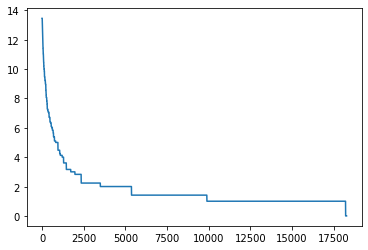

In [16]:
data = np.column_stack((df['mentality_interceptions'], df['power_long_shots']))
kneighbor = kneighbors_graph(data, 30, mode = 'distance')
kneighbors = kneighbor.toarray()
kneighbors_max = np.amax(kneighbors, axis= 0)
kneighbors_sorted = np.sort(kneighbors_max)[::-1]
plt.plot(kneighbors_sorted)
plt.show()

Use the estimated parameter range for DBSCAN (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Visualize the result. Adjust the parameters to get better results and create one plot with and one without the detected noise (it has cluster label < 0).

Estimated no. of clusters: 2
Estimated no. of noise points: 246


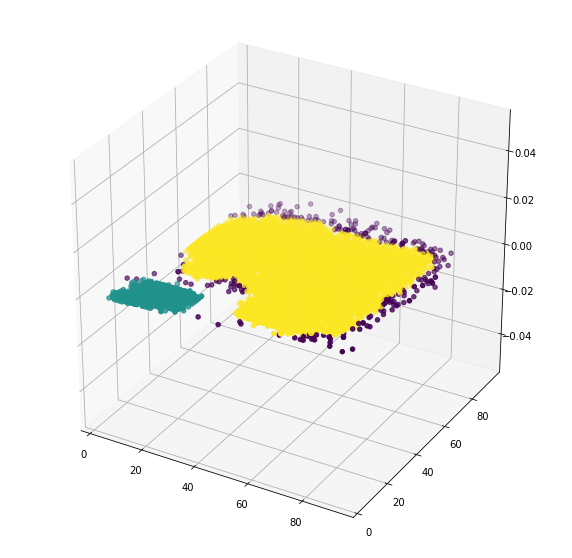

In [129]:
# Run DBSCAN
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import axes3d
data1 = df[['mentality_interceptions','power_long_shots']]
clustering = DBSCAN(eps= 3, min_samples= 30).fit(data1)
labels = clustering.labels_
no_clusters = len(np.unique(labels))- (1 if -1 in labels else 0)
no_noise = np.sum(np.array(labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1['mentality_interceptions'],data1['power_long_shots'],c=list(labels))
plt.show()

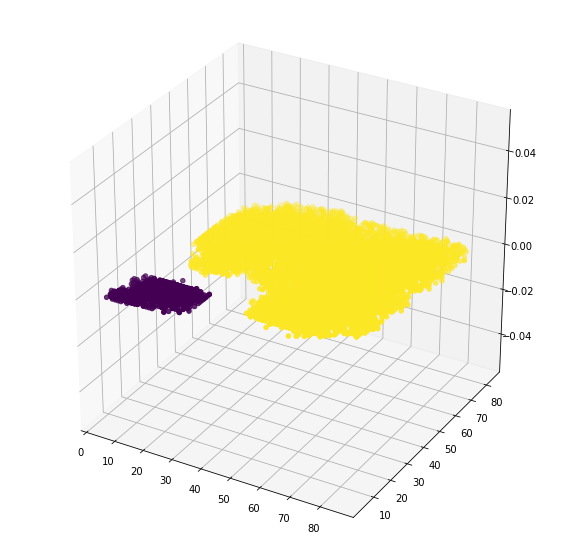

In [130]:
# Visualization without noise
df['dbscan_cluster_labels'] = labels
df_filtered = df[df.dbscan_cluster_labels >-1]
lable_fil = df_filtered['dbscan_cluster_labels']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_filtered['mentality_interceptions'],df_filtered['power_long_shots'], c = list(lable_fil))
plt.show()

# 2 Agglomerative Hierarchical Clustering

Secondly we will look at agglomerative hierarchical clustering.  
Use the sklearn implementation of agglomerative clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to cluster the same data as before. Try different numbers of clusters (the parameter n_clusters) and see which work well.  
Visualize the resulting clusters with a scatterplot.


In [113]:
# Run Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
clustering_ag = AgglomerativeClustering(n_clusters = 3).fit(data1)
clustering_ag
AgglomerativeClustering()
clustering_ag.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

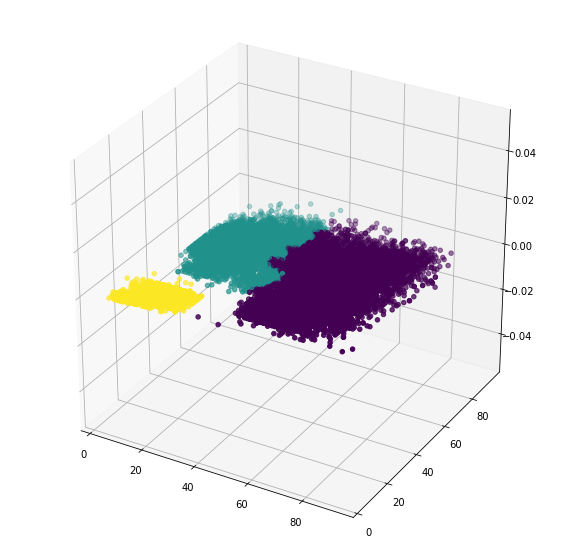

In [121]:
# Visualization
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1['mentality_interceptions'],data1['power_long_shots'],c=list(clustering_ag.labels_))
plt.show()